In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_sal=pd.read_csv('Salary_Data.csv')
data_sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data_sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
data_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data_sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 1.0, 'Scatter Plot')

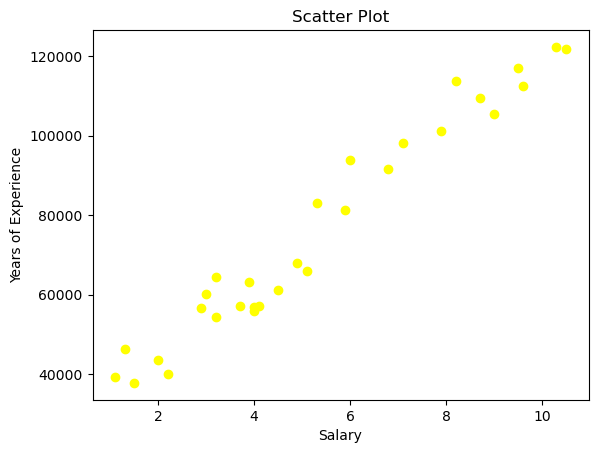

In [8]:
plt.scatter(data_sal.iloc[:,0],data_sal.iloc[:,1],c='yellow')
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.title('Scatter Plot')

C:\Users\Swapna\AppData\Local\Temp\ipykernel_26788\3428919009.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_sal['Salary'],data_sal['YearsExperience'])
C:\Users\Swapna\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='Salary', ylabel='Density'>

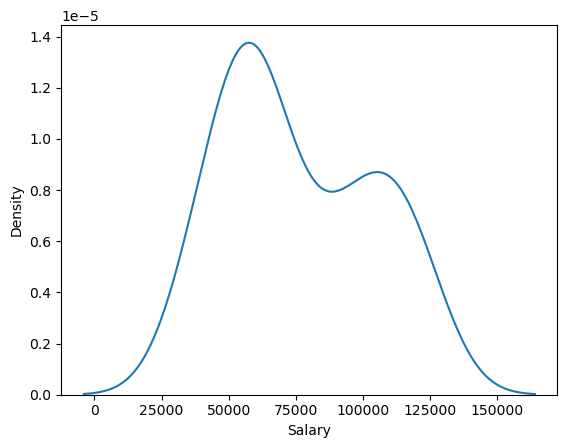

In [9]:
import seaborn as sns
sns.distplot(data_sal['Salary'],data_sal['YearsExperience'])

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

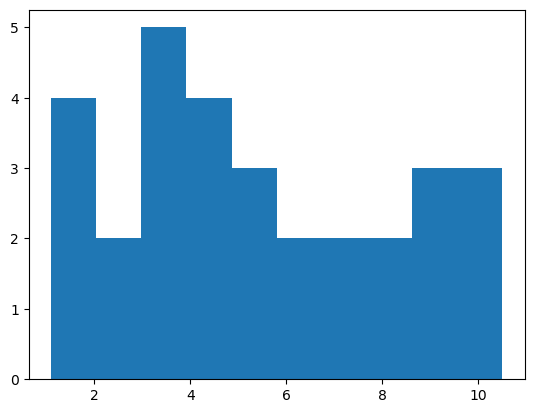

In [10]:
plt.hist(data_sal.iloc[:,0])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

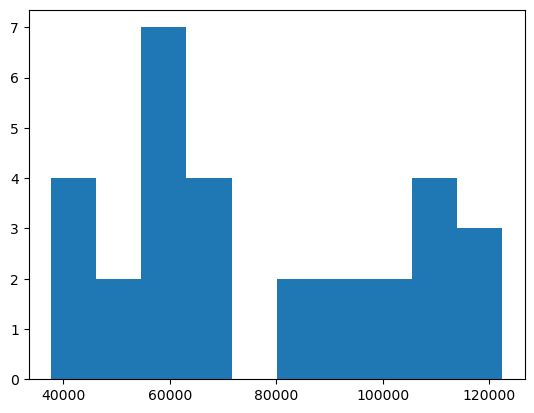

In [11]:
plt.hist(data_sal.iloc[:,1])

In [12]:
data_sal.corr()## We have 97% correlation

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [13]:
##Lets build a Linear Regression Model
import statsmodels.formula.api as smf
regmodel=smf.ols("data_sal['Salary']~data_sal['YearsExperience']",data=data_sal).fit()
regmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_sal['Salary']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        14:37:47   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
data_sal['YearsExperience']  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pred_sal=regmodel.predict()
pred_sal

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [15]:
data_sal['Salary Hike']=pred_sal
data_sal

,YearsExperience,Salary,Salary Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [16]:
rmse=np.sqrt(np.mean((np.array(data_sal['Salary'])-np.array(pred_sal))**2))
rmse

5592.043608760662

Text(0.5, 1.0, 'Linear Plot')

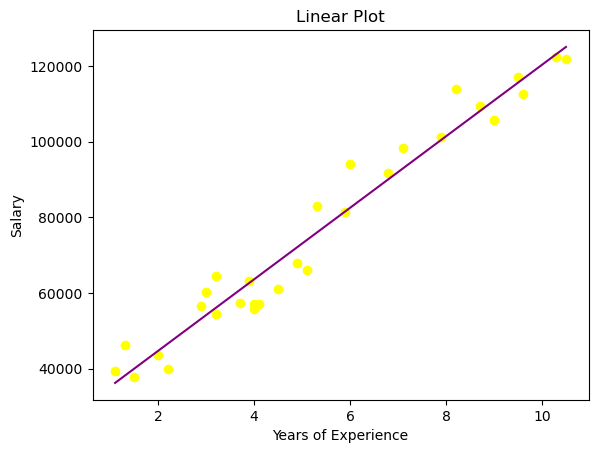

In [17]:
plt.scatter(data_sal.iloc[:,0],data_sal.iloc[:,1],c='yellow')
plt.plot(data_sal['YearsExperience'],pred_sal,c='purple')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.title("Linear Plot")

## Build a model with logarithmic transformation

In [18]:

log_model=smf.ols("data_sal['Salary']~np.log(data_sal['YearsExperience'])",data=data_sal).fit()

In [19]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_sal['Salary']   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        14:37:48   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(data_sal['YearsExperience'])  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
log_model_pred=log_model.predict(data_sal['YearsExperience'])
log_model_pred

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [21]:
log_model_resid=log_model.resid
log_model_resid


0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [22]:
data_sal['log_pred']=log_model_pred
data_sal

,YearsExperience,Salary,Salary Hike,log_pred
0,1.1,39343.0,36187.158752,18795.848339
1,1.3,46205.0,38077.151217,25575.235192
2,1.5,37731.0,39967.143681,31382.551905
3,2.0,43525.0,44692.124842,43057.262306
4,2.2,39891.0,46582.117306,46925.138875
5,2.9,56642.0,53197.090931,58136.050079
6,3.0,60150.0,54142.087163,59511.842441
7,3.2,54445.0,56032.079627,62130.943929
8,3.2,64445.0,56032.079627,62130.943929
9,3.7,57189.0,60757.060788,68022.718504


In [23]:
log_model_rmse=np.sqrt(np.mean((np.array(data_sal['Salary'])-np.array(log_model_pred))**2))
log_model_rmse

10302.893706228308

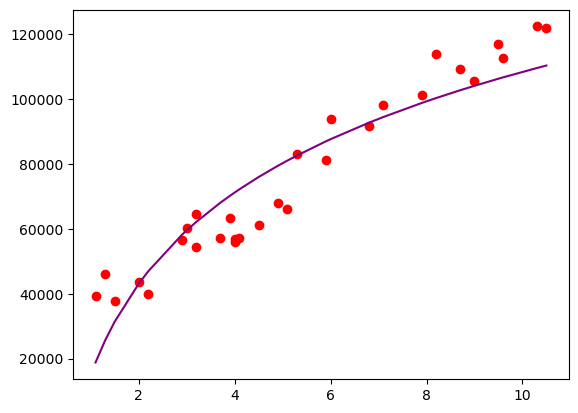

In [24]:
plt.scatter(data_sal['YearsExperience'],data_sal['Salary'],c='red')
plt.plot(data_sal['YearsExperience'],log_model_pred,c='purple')

## Build a model with exponential model


In [26]:
exp_model=smf.ols("np.log(data_sal['Salary'])~data_sal['YearsExperience']",data=data_sal).fit()
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(data_sal['Salary'])   R-squared:                       0.932
Model:                                    OLS   Adj. R-squared:                  0.930
Method:                         Least Squares   F-statistic:                     383.6
Date:                        Sun, 11 Jun 2023   Prob (F-statistic):           7.03e-18
Time:                                14:37:48   Log-Likelihood:                 28.183
No. Observations:                          30   AIC:                            -52.37
Df Residuals:                              28   BIC:                            -49.56
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.5074      0.038    273.327      0.000      10.429      10.586
data_sal['YearsExperience']     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
exp_model_pred=np.exp(exp_model.predict(data_sal['YearsExperience']))
exp_model_pred

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [28]:
exp_model_resid=exp_model.resid
exp_model_resid

0    -0.065327
1     0.070353
2    -0.157344
3    -0.077217
4    -0.189492
5     0.073291
6     0.120836
7    -0.003905
8     0.164716
9    -0.017461
10    0.057676
11   -0.079792
12   -0.059162
13   -0.069532
14   -0.051493
15    0.004230
16   -0.049362
17    0.155353
18    0.059102
19    0.190292
20    0.066210
21    0.097387
22    0.027382
23    0.106188
24    0.004207
25   -0.069235
26   -0.029540
27   -0.079842
28   -0.084591
29   -0.113931
dtype: float64

In [29]:
exp_model_rmse=np.sqrt(np.mean((np.array(data_sal['Salary'])-np.array(exp_model_pred))**2))
exp_model_rmse

7213.235076620129

Text(0.5, 1.0, 'Exponential Model')

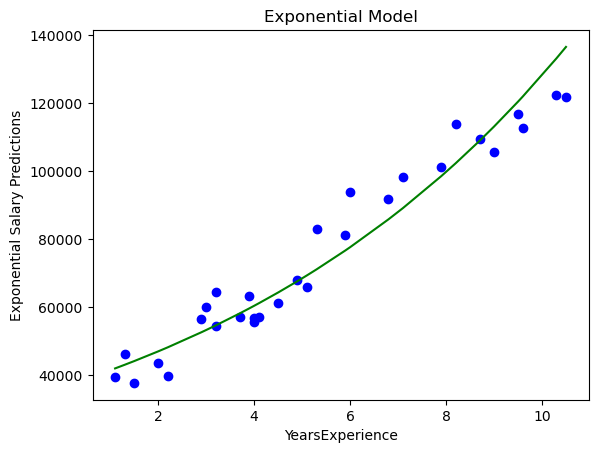

In [30]:
plt.scatter(data_sal['YearsExperience'],data_sal['Salary'],c='blue')
plt.plot(data_sal['YearsExperience'],exp_model_pred,c='green')
plt.xlabel('YearsExperience')
plt.ylabel('Exponential Salary Predictions')
plt.title('Exponential Model')

In [31]:
result_table=pd.DataFrame({'Model':['Linear Model','Log Model','Exp Model'],
                          'RMSE':[rmse,log_model_rmse,exp_model_rmse],
                          'R Square':[regmodel.rsquared,log_model.rsquared,exp_model.rsquared]})
result_table

,Model,RMSE,R Square
0,Linear Model,5592.043609,0.956957
1,Log Model,10302.893706,0.853889
2,Exp Model,7213.235077,0.931967


## Sqrt Tansformation

In [32]:
## We prefer Linear model as it has 95% accuracy

In [38]:
sqrt_model=smf.ols("data_sal['Salary']~np.sqrt(data_sal['YearsExperience'])",data=data_sal).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_sal['Salary']   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           8.57e-18
Time:                        14:41:23   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(data_sal['YearsExperience'])   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sqrt_model_pred=sqrt_model.predict(data_sal)
sqrt_model_pred

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [40]:
sqrt_model_resid=sqrt_model.resid
sqrt_model_resid

0     11872.488116
1     14942.712991
2      2959.023414
3       889.943789
4     -5608.687794
5      2024.656707
6      4324.481798
7     -3737.905200
8      6262.094800
9     -6583.383867
10    -2683.508208
11   -11151.592049
12    -9988.592049
13   -10895.704394
14   -10869.468875
15    -7871.903446
16   -11636.963118
17     3602.027501
18    -3386.033766
19     8340.277710
20     -426.765553
21     3746.781113
22      712.060829
23    11027.905399
24     3077.347694
25    -2864.272632
26     5111.080858
27      105.613313
28     5256.090632
29     3450.194284
dtype: float64

In [41]:
sqrt_model_rmse=np.sqrt(np.mean((np.array(data_sal['Salary'])-np.array(sqrt_model_pred))**2))
sqrt_model_rmse

7080.09573498304

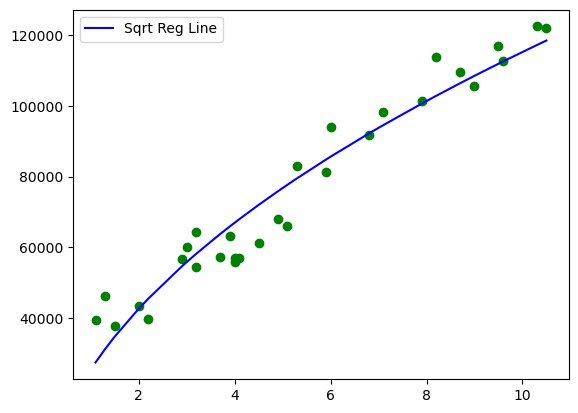

In [65]:
import matplotlib.pyplot as plt
plt.scatter(data_sal['YearsExperience'],data_sal['Salary'],c='Green')
plt.plot(data_sal['YearsExperience'],sqrt_model_pred,c='Blue',label='Sqrt Reg Line')
plt.legend()

### Cube Root Transformation

In [44]:
cbrt_model=smf.ols("data_sal['Salary']~np.cbrt(data_sal['YearsExperience'])",data=data_sal).fit()
cbrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     data_sal['Salary']   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.91e-16
Time:                        14:45:45   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(data_sal['YearsExperience'])  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
cbrt_model_pred=cbrt_model.predict(data_sal)
cbrt_model_pred

0      24463.801275
1      29131.601199
2      33342.086479
3      42439.314513
4      45650.825046
5      55557.034160
6      56836.763462
7      59313.323958
8      59313.323958
9      65083.071599
10     67245.157746
11     68298.552558
12     68298.552558
13     69334.533886
14     73317.728330
15     77071.347199
16     78871.841921
17     80625.859192
18     85636.577536
19     86438.201554
20     92551.294556
21     94719.723555
22    100218.353827
23    102184.405588
24    105357.227078
25    107202.916114
26    110189.976243
27    110774.734426
28    114758.482804
29    115863.387681
dtype: float64

In [46]:
cbrt_model_resid=cbrt_model.resid
cbrt_model_resid

0     14879.198725
1     17073.398801
2      4388.913521
3      1085.685487
4     -5759.825046
5      1084.965840
6      3313.236538
7     -4868.323958
8      5131.676042
9     -7894.071599
10    -4027.157746
11   -12504.552558
12   -11341.552558
13   -12253.533886
14   -12206.728330
15    -9133.347199
16   -12842.841921
17     2462.140808
18    -4273.577536
19     7501.798446
20     -813.294556
21     3553.276445
22     1083.646173
23    11627.594412
24     4073.772922
25    -1620.916114
26     6779.023757
27     1860.265574
28     7632.517196
29     6008.612319
dtype: float64

In [47]:
cbrt_model_rmse=np.sqrt(np.mean((np.array(data_sal['Salary'])-np.array(cbrt_model_pred))**2))
cbrt_model_rmse

8027.035983458383

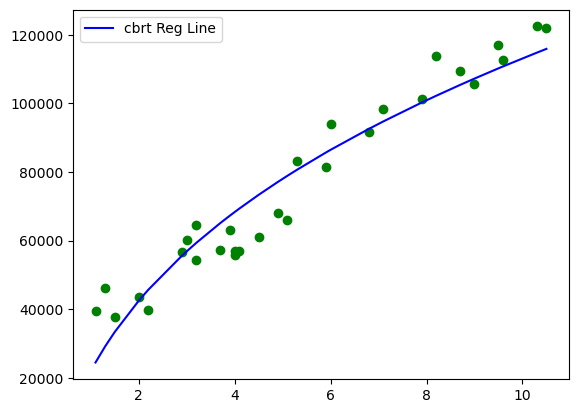

In [66]:
import matplotlib.pyplot as plt
plt.scatter(data_sal['YearsExperience'],data_sal['Salary'],c='Green')
plt.plot(data_sal['YearsExperience'],cbrt_model_pred,c='Blue',label='cbrt Reg Line')
plt.legend()

## Plotting all regression lines

Text(0.5, 1.0, 'Comparision of different Regression Lines')

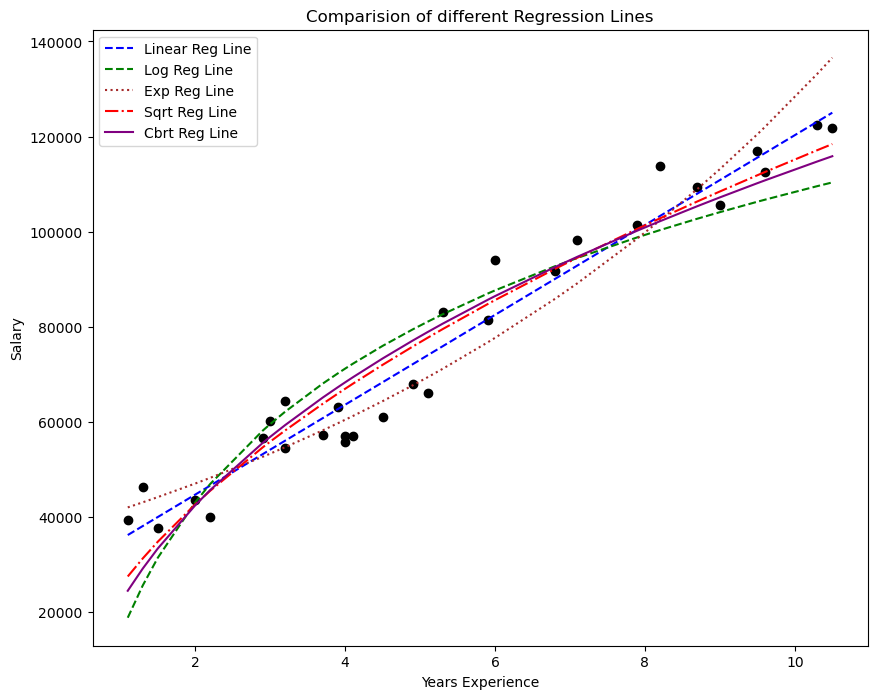

In [81]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.scatter(data_sal['YearsExperience'],data_sal['Salary'],c='Black')
plt.plot(data_sal['YearsExperience'],pred_sal,c='Blue',label='Linear Reg Line',linestyle='--')
plt.plot(data_sal['YearsExperience'],log_model_pred,c='Green',label='Log Reg Line',linestyle='--')
plt.plot(data_sal['YearsExperience'],exp_model_pred,c='Brown',label='Exp Reg Line',linestyle=':')
plt.plot(data_sal['YearsExperience'],sqrt_model_pred,c='Red',label='Sqrt Reg Line',linestyle='-.')
plt.plot(data_sal['YearsExperience'],cbrt_model_pred,c='Purple',label='Cbrt Reg Line',linestyle='-')
plt.legend()
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Comparision of different Regression Lines')

#### Create a table with all transformations R Square values and RMSE Values

In [49]:
result_table=pd.DataFrame({'Model':['Linear Model','Log Model','Exp Model','Sqrt Model','cbrt Model'],
                          'RMSE':[rmse,log_model_rmse,exp_model_rmse,sqrt_model_rmse,cbrt_model_rmse],
                          'R Square':[regmodel.rsquared*100,log_model.rsquared*100,exp_model.rsquared*100,sqrt_model.rsquared*100,cbrt_model.rsquared*100]})
result_table

,Model,RMSE,R Square
0,Linear Model,5592.043609,95.695666
1,Log Model,10302.893706,85.388888
2,Exp Model,7213.235077,93.196712
3,Sqrt Model,7080.095735,93.100095
4,cbrt Model,8027.035983,91.130988


### From the above transformations we can see that Linear model has more R square value and less rmse value